In [1]:
import SKiNN
import torch
print(torch.version.cuda)
torch.cuda.is_available() #must be True to function

11.7


True

In [2]:
#load all paths and scaling values. This piece will need to go into lenstronomy, but does not need any input from user
weights_path = SKiNN.useful_functions.get_weights_path()
import SKiNN.src.NN_models as NN_models
model=NN_models.Generator_imp()
scaling_y = SKiNN.useful_functions.get_scaling_y()
print(scaling_y)
scaling_x = SKiNN.useful_functions.get_scaling_x()

504.02519129029594


input params:  [0.944922512, 0.826468232, 1.00161407, 3.10945081, 0.790308638, 0.0001, 0.460606795, 0.267345695, 89.3001866]


/home/gomer/miniconda3/envs/lenstro_kin_clean/lib/python3.10/site-packages/torch/nn/functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


<Figure size 2400x600 with 0 Axes>

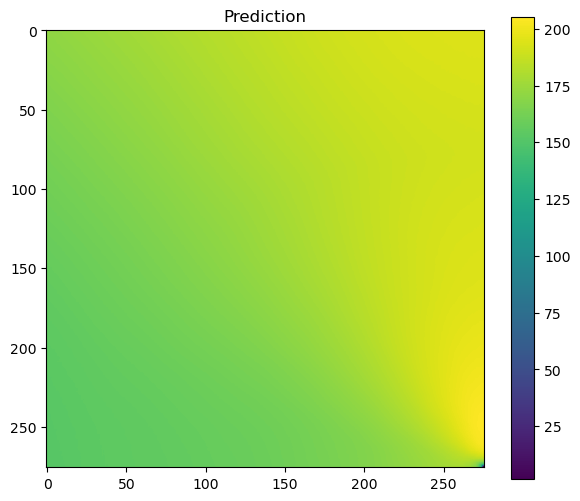

<Figure size 2400x600 with 0 Axes>

In [3]:
#Initialize and run generator. This piece will have to go inside the class init in lenstronomy

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
net = model.load_from_checkpoint(weights_path).cuda()
def generate_maps(net,scaling_x,scaling_y,input_p, plot=True):
    """Generate velocity maps given input parameters.
    
    net: neural network object
    scaling_x: input scaler
    scaling_y: output scaling
    input_p: input parameters
    plt: plot if True
    
    Returns the velocity maps 
    """
    
    input_p = scaling_x.transform(np.reshape(input_p,(-1,len(input_p))))
    input_p = torch.Tensor(input_p).cuda()
    net.eval()
    
    with torch.no_grad():
        pred = net(input_p).cpu().numpy()
    
    if plot:
        plt.figure(figsize=(24, 6))
        plt.subplot(131)
        plt.imshow(scaling_y*pred[0,:,:].squeeze())
        plt.title('Prediction')
        plt.colorbar()
    
    return pred*scaling_y

example_input = [9.44922512e-01, 8.26468232e-01, 1.00161407e+00, 3.10945081e+00, 7.90308638e-01, 1.00000000e-04, 4.60606795e-01, 2.67345695e-01, 8.93001866e+01]
print('input params: ',example_input)
output = generate_maps(net,scaling_x,scaling_y,example_input, plot=True)
plt.figure(figsize=(24, 6))

(1, 1, 276, 276)
(551, 551)


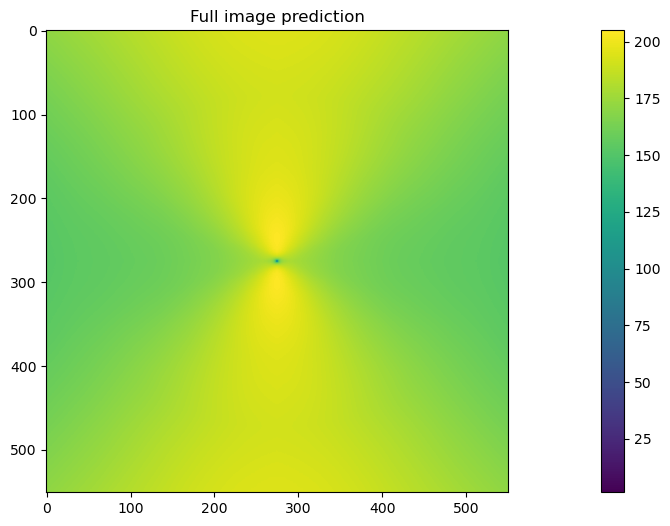

In [4]:

plt.figure(figsize=(24, 6))
plt.imshow(SKiNN.useful_functions.mirror_output(output))
plt.title('Full image prediction')
plt.colorbar()
print(np.shape(output))
print(np.shape(SKiNN.useful_functions.mirror_output(output)))
    
    